In [1]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install diffusers transformers accelerate 

  Using cached transformers-4.52.4-py3-none-any.whl.metadata (38 kB)
  Using cached accelerate-1.7.0-py3-none-any.whl.metadata (19 kB)
Using cached transformers-4.52.4-py3-none-any.whl (10.5 MB)
Using cached accelerate-1.7.0-py3-none-any.whl (362 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Python312\\Scripts\\accelerate.exe' -> 'c:\\Python312\\Scripts\\accelerate.exe.deleteme'


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install transformers

import kagglehub
import torch
from diffusers import DDPMScheduler, UNet2DConditionModel, AutoencoderKL
from transformers import CLIPTextModel, CLIPTokenizer


  Using cached transformers-4.52.4-py3-none-any.whl.metadata (38 kB)
Using cached transformers-4.52.4-py3-none-any.whl (10.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Python312\\Scripts\\transformers.exe' -> 'c:\\Python312\\Scripts\\transformers.exe.deleteme'


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruits


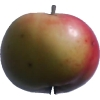

Image Path: /kaggle/input/fruits/fruits-360_100x100/fruits-360/Test/Apple 11/r0_107_100.jpg
Image Format: JPEG
Image Mode: RGB
Image Size (Width, Height): (100, 100)
Image Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


In [ ]:

from PIL import Image

# Assuming the file exists at the specified path within the downloaded dataset
image_path = f"{path}/fruits-360_100x100/fruits-360/Test/Apple 11/r0_107_100.jpg"

try:
    img = Image.open(image_path)

    # Get image information
    display(img)
    print(f"Image Path: {image_path}")
    print(f"Image Format: {img.format}")
    print(f"Image Mode: {img.mode}")
    print(f"Image Size (Width, Height): {img.size}")
    print(f"Image Info: {img.info}")

    # Optional: Display the image
    # from IPython.display import display
    # display(img)

except FileNotFoundError:
    print(f"Error: Image not found at path: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Total classes: 201
10 PRIMERAS CLASES ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6']


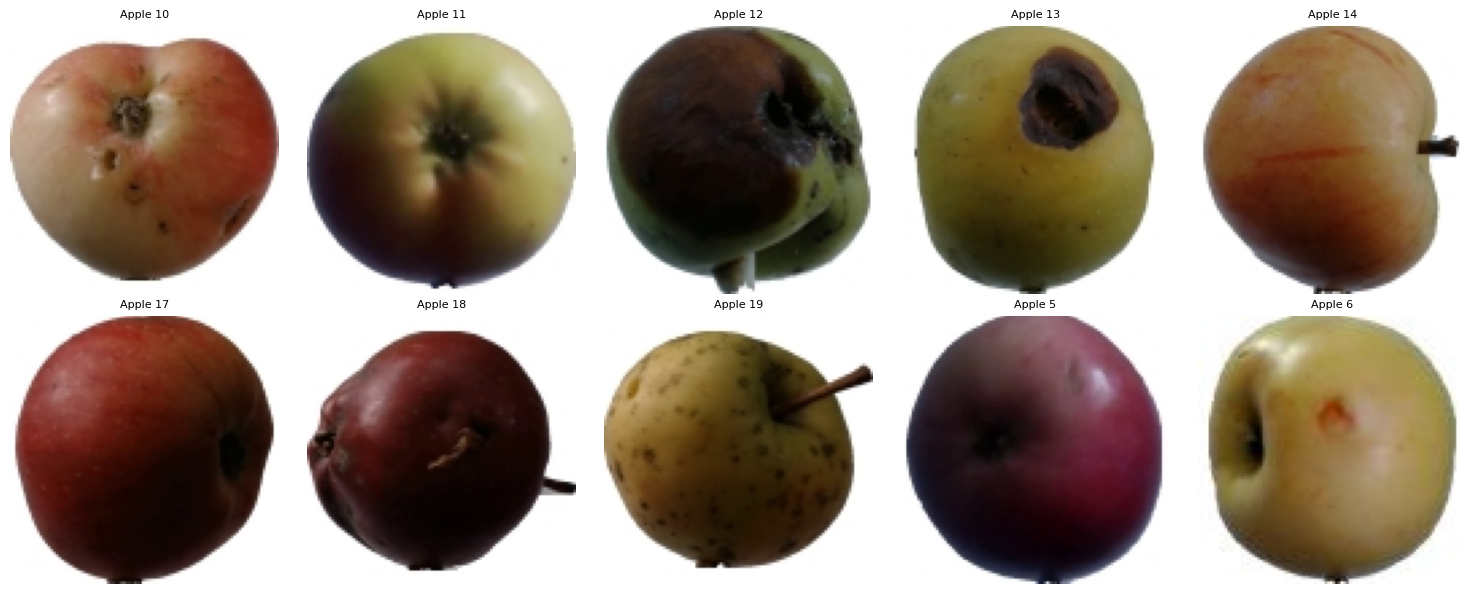

In [ ]:
# 4. Dataset exploration
import os
from PIL import Image
import matplotlib.pyplot as plt

# Check the dataset structure
dataset_path = "/kaggle/input/fruits/fruits-360_100x100/fruits-360"
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Test")

# Get all fruit classes
fruit_classes = sorted(os.listdir(train_path))
print(f"Total classes: {len(fruit_classes)}")
print("10 PRIMERAS CLASES", fruit_classes[:10])

# 5. Quick visualization
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, fruit_class in enumerate(fruit_classes[:10]):
    class_path = os.path.join(train_path, fruit_class)
    img_files = os.listdir(class_path)
    if img_files:
        img_path = os.path.join(class_path, img_files[8])
        img = Image.open(img_path)
        axes[i//5, i%5].imshow(img)
        axes[i//5, i%5].set_title(fruit_class, fontsize=8)
        axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.show()

In [ ]:

test_directory_path = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Test"

if os.path.isdir(test_directory_path):
  subfolders = [f.name for f in os.scandir(test_directory_path) if f.is_dir()]
  print(subfolders)
else:
  print(f"Directory not found: {test_directory_path}")

['Melon Piel de Sapo 1', 'Dates 1', 'Apple Crimson Snow 1', 'Onion Red 1', 'Cherry Wax Yellow 1', 'Cherry 3', 'Avocado Green 1', 'Pear Red 1', 'Potato Red 1', 'Apple 7', 'Quince 4', 'Tomato Cherry Red 2', 'Apple Red 3', 'Huckleberry 1', 'Avocado 1', 'Blackberrie 1', 'Grape White 2', 'Tomato not Ripen 1', 'Tomato 9', 'Nut Pecan 1', 'Guava 1', 'Walnut 1', 'Apple 18', 'Tomato Maroon 1', 'Cherry Wax Red 1', 'Cucumber 1', 'Rambutan 1', 'Cactus fruit red 1', 'Cherry Rainier 2', 'Tomato Cherry Red 1', 'Cherry Sour 1', 'Pear 3', 'Pear 1', 'Strawberry 1', 'Potato Red Washed 1', 'Pear Monster 1', 'Apple worm 1', 'Cherry 4', 'Tomato Cherry Orange 1', 'Potato Sweet 1', 'Apple 5', 'Ginger Root 1', 'Cherry Rainier 3', 'Onion Red Peeled 1', 'Cucumber 5', 'Apple 17', 'Tomato 1', 'Pear Forelle 1', 'Cherry 2', 'Apple 13', 'Apple Red 2', 'Kohlrabi 1', 'Raspberry 1', 'Cherry 5', 'Pepper Yellow 1', 'Mulberry 1', 'Apple 12', 'Cactus fruit 1', 'Apple 19', 'Eggplant long 1', 'Apple Core 1', 'Apple 11', 'Banan

In [ ]:
# 6. Filter meaningful classes
def has_descriptive_info(class_name):
    descriptive_keywords = [
        # Colors
        'red', 'green', 'yellow', 'white', 'pink', 'black', 'orange', 'blue', 'dark', 'marron '
        # States/Varieties
        'ripe', 'ripen', 'washed', 'peeled', 'flat', 'mini', 'sweet', 'sour',
        # Specific varieties
        'crimson', 'golden', 'granny', 'delicious', 'lady', 'braeburn', 'meyer',
        'rainier', 'forelle', 'williams', 'abate', 'kaiser', 'monster', 'stone', 'sapo'
        # Conditions
        'fresh', 'rotten', 'worm', 'core', 'heart', 'wedge', 'husk', 'long', 'washed'
    ]

    name_lower = class_name.lower()
    return any(keyword in name_lower for keyword in descriptive_keywords)

# Filter classes
descriptive_classes = [cls for cls in fruit_classes if has_descriptive_info(cls)]
filtered_out = [cls for cls in fruit_classes if not has_descriptive_info(cls)]

print(f"Original classes: {len(fruit_classes)}")
print(f"Descriptive classes: {len(descriptive_classes)}")
print(f"Filtered out: {len(filtered_out)}")
print("\nFiltered out examples:", filtered_out[:10])
print("\nKeeping examples:", descriptive_classes[:10])

Original classes: 201
Descriptive classes: 87
Filtered out: 114

Filtered out examples: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6']

Keeping examples: ['Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2']


In [ ]:
# 7. Create text descriptions mapping
def create_text_description(class_name):
    """Convert class name to natural text description"""

    # Clean the class name
    name = class_name.lower().replace(' 1', '').replace(' 2', '').replace(' 3', '')

    # Base fruit/vegetable name
    if 'apple' in name:
        base = 'apple'
    elif 'cherry' in name:
        base = 'cherry'
    elif 'tomato' in name:
        base = 'tomato'
    elif 'pear' in name:
        base = 'pear'
    elif 'grape' in name:
        base = 'grape'
    elif 'cucumber' in name:
        base = 'cucumber'
    elif 'pepper' in name:
        base = 'bell pepper'
    elif 'banana' in name:
        base = 'banana'
    else:
        base = name.split()[0]

    # Extract descriptors
    descriptors = []

    # Colors
    if 'red' in name: descriptors.append('red')
    elif 'green' in name: descriptors.append('green')
    elif 'yellow' in name: descriptors.append('yellow')
    elif 'white' in name: descriptors.append('white')
    elif 'pink' in name: descriptors.append('pink')
    elif 'black' in name: descriptors.append('black')
    elif 'orange' in name: descriptors.append('orange')
    elif 'blue' in name: descriptors.append('blue')

    # States
    if 'ripe' in name: descriptors.append('ripe')
    elif 'not ripen' in name: descriptors.append('unripe')
    if 'fresh' in name: descriptors.append('fresh')
    if 'sweet' in name: descriptors.append('sweet')
    if 'flat' in name: descriptors.append('flat')
    if 'mini' in name: descriptors.append('small')

    # Varieties
    if 'golden' in name: descriptors.append('golden')
    if 'granny smith' in name: descriptors.append('granny smith')
    if 'delicious' in name: descriptors.append('red delicious')

    # Combine
    if descriptors:
        description = f"{' '.join(descriptors)} {base}, whole fruit, realistic photo"
    else:
        description = f"{base}, whole fruit, realistic photo"

    return description

# Test the mapping
print("Text mapping examples:")
for cls in descriptive_classes[:10]:
    description = create_text_description(cls)
    print(f"{cls} -> {description}")

Text mapping examples:
Apple Braeburn 1 -> apple, whole fruit, realistic photo
Apple Core 1 -> apple, whole fruit, realistic photo
Apple Crimson Snow 1 -> apple, whole fruit, realistic photo
Apple Golden 1 -> golden apple, whole fruit, realistic photo
Apple Golden 2 -> golden apple, whole fruit, realistic photo
Apple Golden 3 -> golden apple, whole fruit, realistic photo
Apple Granny Smith 1 -> granny smith apple, whole fruit, realistic photo
Apple Pink Lady 1 -> pink apple, whole fruit, realistic photo
Apple Red 1 -> red apple, whole fruit, realistic photo
Apple Red 2 -> red apple, whole fruit, realistic photo


In [ ]:
# 8. Create dataset class
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np

class FruitDiffusionDataset(Dataset):
    def __init__(self, data_path, fruit_classes, transform=None, split='Training'):
        self.data_path = data_path
        self.fruit_classes = fruit_classes
        self.transform = transform
        self.split = split

        # Collect all image paths and their descriptions
        self.image_paths = []
        self.text_descriptions = []

        split_path = os.path.join(data_path, split)

        for fruit_class in fruit_classes:
            class_path = os.path.join(split_path, fruit_class)
            if os.path.exists(class_path):
                image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]

                for img_file in image_files:
                    img_path = os.path.join(class_path, img_file)
                    text_desc = create_text_description(fruit_class)

                    self.image_paths.append(img_path)
                    self.text_descriptions.append(text_desc)

        print(f"Dataset created with {len(self.image_paths)} images")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image
        image = Image.open(self.image_paths[idx]).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return {
            'image': image,
            'text': self.text_descriptions[idx]
        }

# 9. Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Slightly larger for better quality
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Create datasets
train_dataset = FruitDiffusionDataset(
    dataset_path,
    descriptive_classes,
    transform=transform,
    split='Training'
)

test_dataset = FruitDiffusionDataset(
    dataset_path,
    descriptive_classes,
    transform=transform,
    split='Test'
)

# Create data loaders
batch_size = 8  # Small batch for Colab
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train dataset: {len(train_dataset)} images")
print(f"Test dataset: {len(test_dataset)} images")

Dataset created with 43338 images
Dataset created with 14463 images
Train dataset: 43338 images
Test dataset: 14463 images


In [ ]:
print(f"Original classes: {len(fruit_classes)}")
print(f"Descriptive classes: {len(descriptive_classes)}")
print(f"Filtered out: {len(filtered_out)}")

Original classes: 201
Descriptive classes: 87
Filtered out: 114


## some classes of the filtered set

Total classes: 201
Descriptive classes: 91
10 RANDOM DESCRIPTIVE CLASSES ['Tomato Cherry Red 1', 'Nectarine Flat 1', 'Pepper Green 1', 'Onion White 1', 'Apple Red 2', 'Avocado ripe 1', 'Redcurrant 1', 'Tomato not Ripen 1', 'Pepper Yellow 1', 'Apple Red Yellow 2']


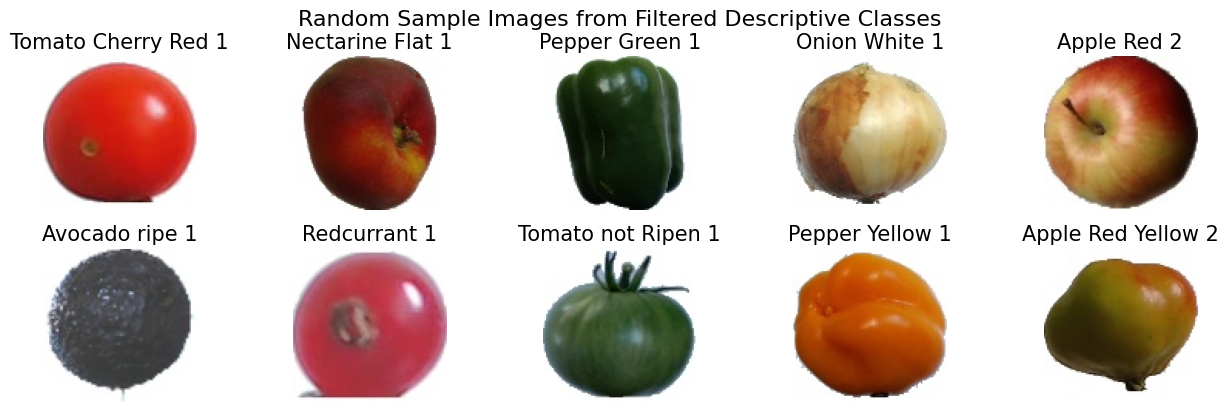

In [ ]:
# 4. Dataset exploration
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Check the dataset structure
dataset_path = "/kaggle/input/fruits/fruits-360_100x100/fruits-360"
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Test")

# Get all fruit classes
fruit_classes = sorted(os.listdir(train_path))
print(f"Total classes: {len(fruit_classes)}")

# Filter meaningful classes (same logic as before)
def has_descriptive_info(class_name):
    descriptive_keywords = [
        # Colors
        'red', 'green', 'yellow', 'white', 'pink', 'black', 'orange', 'blue', 'dark', 'marron',
        # States/Varieties
        'ripe', 'ripen', 'washed', 'peeled', 'flat', 'mini', 'sweet', 'sour',
        # Specific varieties
        'crimson', 'golden', 'granny', 'delicious', 'lady', 'braeburn', 'meyer',
        'rainier', 'forelle', 'williams', 'abate', 'kaiser', 'monster', 'stone', 'sapo',
        # Conditions
        'fresh', 'rotten', 'worm', 'core', 'heart', 'wedge', 'husk', 'long', 'washed'
    ]

    name_lower = class_name.lower()
    return any(keyword in name_lower for keyword in descriptive_keywords)

# Filter classes
descriptive_classes = [cls for cls in fruit_classes if has_descriptive_info(cls)]
print(f"Descriptive classes: {len(descriptive_classes)}")

# Select 10 random classes from descriptive set
random_descriptive_classes = random.sample(descriptive_classes, 10)
print("10 RANDOM DESCRIPTIVE CLASSES", random_descriptive_classes)

# 5. Quick visualization of random filtered classes
fig, axes = plt.subplots(2, 5, figsize=(13, 4))
for i, fruit_class in enumerate(random_descriptive_classes):
    class_path = os.path.join(train_path, fruit_class)
    img_files = os.listdir(class_path)
    if img_files:
        # Also randomize which image to show from each class
        random_img = random.choice(img_files)
        img_path = os.path.join(class_path, random_img)
        img = Image.open(img_path)
        axes[i//5, i%5].imshow(img)
        axes[i//5, i%5].set_title(fruit_class, fontsize=15)
        axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.suptitle('Random Sample Images from Filtered Descriptive Classes', fontsize=16, y=1.02)
plt.show()

In [ ]:
# 10. Set up diffusion model components
from diffusers import UNet2DConditionModel, DDPMScheduler, AutoencoderKL
from transformers import CLIPTextModel, CLIPTokenizer
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Text encoder (CLIP)
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
text_encoder.to(device)
text_encoder.eval()  # We'll freeze this during training

# VAE (for latent space)
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse")
vae.to(device)
vae.eval()  # We'll freeze this too

# U-Net (this is what we'll train)
unet = UNet2DConditionModel(
    sample_size=16,  # 128//8 = 16 (VAE downsamples by 8)
    in_channels=4,   # VAE latent channels
    out_channels=4,
    layers_per_block=2,
    block_out_channels=(128, 256, 512, 512),
    down_block_types=(
        "CrossAttnDownBlock2D",
        "CrossAttnDownBlock2D",
        "CrossAttnDownBlock2D",
        "DownBlock2D"
    ),
    up_block_types=(
        "UpBlock2D",
        "CrossAttnUpBlock2D",
        "CrossAttnUpBlock2D",
        "CrossAttnUpBlock2D"
    ),
    cross_attention_dim=512,  # CLIP embedding dim
)
unet.to(device)

# Noise scheduler
scheduler = DDPMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
)

print("Models loaded successfully!")
print(f"UNet parameters: {sum(p.numel() for p in unet.parameters() if p.requires_grad):,}")

Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Models loaded successfully!
UNet parameters: 139,680,132


In [ ]:
# 11. Training utilities
def encode_text(texts):
    """Encode text prompts to embeddings"""
    inputs = tokenizer(texts, padding=True, truncation=True,
                      max_length=77, return_tensors="pt")

    with torch.no_grad():
        embeddings = text_encoder(inputs.input_ids.to(device))[0]

    return embeddings

def encode_images(images):
    """Encode images to latent space"""
    with torch.no_grad():
        latents = vae.encode(images).latent_dist.sample()
        latents = latents * 0.18215  # Scaling factor
    return latents

# Test the encoding
sample_batch = next(iter(train_loader))
sample_images = sample_batch['image'][:2].to(device)
sample_texts = sample_batch['text'][:2]

print("Sample texts:", sample_texts)
print("Image shape:", sample_images.shape)

# Test encodings
text_embeddings = encode_text(sample_texts)
image_latents = encode_images(sample_images)

print("Text embeddings shape:", text_embeddings.shape)
print("Image latents shape:", image_latents.shape)

Sample texts: ['red cherry, whole fruit, realistic photo', 'cherry, whole fruit, realistic photo']
Image shape: torch.Size([2, 3, 128, 128])
Text embeddings shape: torch.Size([2, 10, 512])
Image latents shape: torch.Size([2, 4, 16, 16])


## no optimizado: (32hrs)


In [ ]:
# 12. Training loop setup
from torch.optim import AdamW
from tqdm import tqdm
import torch.nn.functional as F

# Training hyperparameters
learning_rate = 1e-4
num_epochs = 2
gradient_accumulation_steps = 4  # To handle memory limits

# Optimizer
optimizer = AdamW(unet.parameters(), lr=learning_rate)

# Move models to eval mode (except UNet)
text_encoder.eval()
vae.eval()
unet.train()

# Freeze text encoder and VAE
for param in text_encoder.parameters():
    param.requires_grad = False
for param in vae.parameters():
    param.requires_grad = False

print("Starting training...")

# Training loop
step = 0
for epoch in range(num_epochs):
    epoch_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch_idx, batch in enumerate(progress_bar):
        images = batch['image'].to(device)
        texts = batch['text']

        # Encode text and images
        text_embeddings = encode_text(texts)
        latents = encode_images(images)

        # Sample noise and timesteps
        noise = torch.randn_like(latents)
        timesteps = torch.randint(0, scheduler.config.num_train_timesteps,
                                 (latents.shape[0],), device=device).long()

        # Add noise to latents
        noisy_latents = scheduler.add_noise(latents, noise, timesteps)

        # Predict noise
        noise_pred = unet(noisy_latents, timesteps, text_embeddings).sample

        # Calculate loss
        loss = F.mse_loss(noise_pred, noise)
        loss = loss / gradient_accumulation_steps

        # Backward pass
        loss.backward()

        if (batch_idx + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
            step += 1

        epoch_loss += loss.item() * gradient_accumulation_steps
        progress_bar.set_postfix({'loss': loss.item() * gradient_accumulation_steps})

        # Save checkpoint every 500 steps
        if step % 500 == 0 and step > 0:
            torch.save({
                'unet': unet.state_dict(),
                'optimizer': optimizer.state_dict(),
                'step': step,
                'loss': loss.item()
            }, f'checkpoint_step_{step}.pt')
            print(f"Checkpoint saved at step {step}")

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1} completed. Average loss: {avg_loss:.4f}")

print("Training completed!")

Starting training...


Epoch 1/2:   0%|          | 1/5418 [00:30<46:16:17, 30.75s/it, loss=0.789]


KeyboardInterrupt: 

---
fin

## optimizado:

In [ ]:
# 12. Optimized Training Loop Setup
from torch.optim import AdamW
from tqdm import tqdm
import torch.nn.functional as F
from torch.amp import autocast, GradScaler
import torch

# Create smaller subset for faster training
print(f"Original dataset size: {len(train_dataset)}")
subset_size = 1000  # Much smaller for testing
indices = torch.randperm(len(train_dataset))[:subset_size]
train_subset = torch.utils.data.Subset(train_dataset, indices)

# Larger batch size for efficiency
batch_size = 16  # Increased from 8
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

print(f"Using subset: {len(train_subset)} images")
print(f"Batches per epoch: {len(train_loader)}")

# Training hyperparameters
learning_rate = 1e-4
num_epochs = 2
gradient_accumulation_steps = 2  # Reduced

# Optimizer
optimizer = AdamW(unet.parameters(), lr=learning_rate)

# Mixed precision scaler
scaler = GradScaler()

# Move models to eval mode (except UNet)
text_encoder.eval()
vae.eval()
unet.train()

# Freeze text encoder and VAE
for param in text_encoder.parameters():
    param.requires_grad = False
for param in vae.parameters():
    param.requires_grad = False

print("Starting optimized training...")

# Training loop
step = 0
for epoch in range(num_epochs):
    epoch_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch_idx, batch in enumerate(progress_bar):
        images = batch['image'].to(device)
        texts = batch['text']

        # Mixed precision training
        # Pass the device type explicitly to autocast
        with autocast(device_type=device.type):
            # Encode text and images
            text_embeddings = encode_text(texts)
            latents = encode_images(images)

            # Sample noise and timesteps
            noise = torch.randn_like(latents)
            timesteps = torch.randint(0, scheduler.config.num_train_timesteps,
                                     (latents.shape[0],), device=device).long()

            # Add noise to latents
            noisy_latents = scheduler.add_noise(latents, noise, timesteps)

            # Predict noise
            noise_pred = unet(noisy_latents, timesteps, text_embeddings).sample

            # Calculate loss
            loss = F.mse_loss(noise_pred, noise)
            loss = loss / gradient_accumulation_steps

        # Backward pass with scaling
        scaler.scale(loss).backward()

        if (batch_idx + 1) % gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            step += 1

        epoch_loss += loss.item() * gradient_accumulation_steps
        progress_bar.set_postfix({'loss': loss.item() * gradient_accumulation_steps})

        # Save checkpoint every 100 steps (more frequent)
        if step % 100 == 0 and step > 0:
            torch.save({
                'unet': unet.state_dict(),
                'optimizer': optimizer.state_dict(),
                'step': step,
                'loss': loss.item()
            }, f'checkpoint_step_{step}.pt')
            print(f"Checkpoint saved at step {step}")

        # Early test generation every 50 steps
        if step % 50 == 0 and step > 0:
            print(f"\nTesting generation at step {step}...")
            try:
                # Assuming generate_image function is defined elsewhere and available
                with torch.no_grad():
                    test_prompt = "red apple, whole fruit, realistic photo"
                    generated = generate_image(test_prompt, num_inference_steps=20)
                    print("Generation test successful!")
            except Exception as e:
                print(f"Generation test failed: {e}")

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1} completed. Average loss: {avg_loss:.4f}")

print("Training completed!")

NameError: name 'train_dataset' is not defined

In [ ]:
# 13. Simple inference test
def generate_image(prompt, num_inference_steps=50):
    """Generate image from text prompt"""
    unet.eval()

    # Encode prompt
    text_embeddings = encode_text([prompt])

    # Random latent
    latents = torch.randn(1, 4, 16, 16, device=device)

    # Set scheduler for inference
    scheduler.set_timesteps(num_inference_steps)

    for t in tqdm(scheduler.timesteps):
        with torch.no_grad():
            noise_pred = unet(latents, t, text_embeddings).sample
            latents = scheduler.step(noise_pred, t, latents).prev_sample

    # Decode latents to image
    with torch.no_grad():
        latents = latents / 0.18215
        images = vae.decode(latents).sample
        images = (images + 1) / 2  # Convert from [-1,1] to [0,1]
        images = torch.clamp(images, 0, 1)

    return images



Generating: red apple, whole fruit, realistic photo


100%|██████████| 20/20 [00:40<00:00,  2.02s/it]


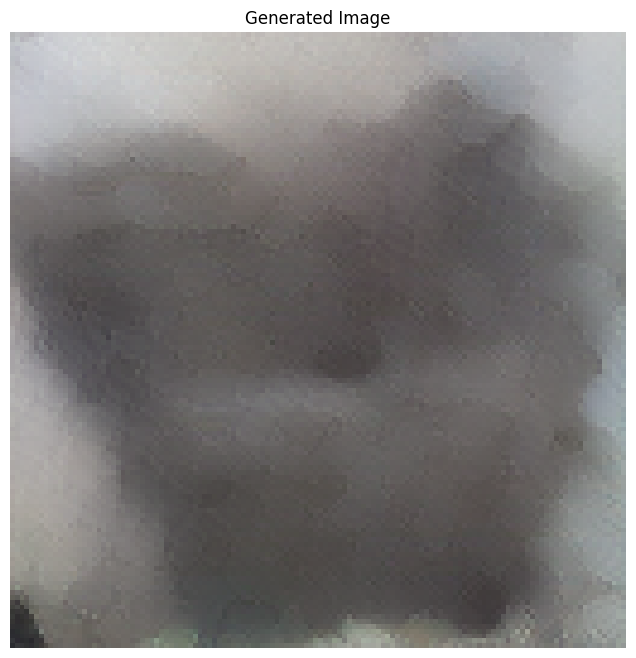

Generated tensor shape: torch.Size([1, 3, 128, 128])
Generated tensor range: 0.158 to 0.849


In [ ]:
# 13. Visualization function
import matplotlib.pyplot as plt
import numpy as np

def show_generated_image(generated_tensor):
    """Convert tensor to displayable image"""
    # Convert from tensor to numpy
    img = generated_tensor[0].cpu().numpy()  # Take first image from batch
    img = np.transpose(img, (1, 2, 0))  # Change from (C, H, W) to (H, W, C)
    img = np.clip(img, 0, 1)  # Ensure values are in [0, 1]

    # Display
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Generated Image")
    plt.show()

    return img

# Test generation with visualization
test_prompt = "red apple, whole fruit, realistic photo"
print(f"Generating: {test_prompt}")
generated_image = generate_image(test_prompt, num_inference_steps=20)  # Fewer steps for speed

# Show the image
show_generated_image(generated_image)

# Also check the tensor info
print(f"Generated tensor shape: {generated_image.shape}")
print(f"Generated tensor range: {generated_image.min().item():.3f} to {generated_image.max().item():.3f}")

In [ ]:
# 14. Generate multiple samples
def generate_multiple_samples(prompts, num_samples=4):
    """Generate and display multiple images"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()

    for i, prompt in enumerate(prompts[:num_samples]):
        print(f"Generating {i+1}/4: {prompt}")
        generated = generate_image(prompt, num_inference_steps=20)

        # Convert to displayable format
        img = generated[0].cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = np.clip(img, 0, 1)

        axes[i].imshow(img)
        axes[i].set_title(prompt, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Test with multiple prompts
test_prompts = [
    "red apple, whole fruit, realistic photo",
    "green apple, whole fruit, realistic photo",
    "yellow banana, whole fruit, realistic photo",
    "orange carrot, whole vegetable, realistic photo"
]

generate_multiple_samples(test_prompts)

NameError: name 'plt' is not defined

In [ ]:
# Test generation (after some training)
test_prompt = "red apple, whole fruit, realistic photo"
generated_image = generate_image(test_prompt)

100%|██████████| 50/50 [01:41<00:00,  2.04s/it]
